In [1]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *
from math import sqrt

In [2]:
def check(C):
    display(paths_from_trace(C))
    sgC2    = successor_graph(C+C)
    weights = set( [sgC2[u][v]["weight"] for u, v in sgC2.edges() ] )
    for f in weights:
        print( (f, list( cliques( f_layer(f, sgC2).to_undirected() )) ) )

In [3]:
B="1234"
A="abcd"

In [4]:
check(A+B+B+A)

[(2.0, ['1', '2', '3', '4']), (2.0, ['a', 'b', 'c', 'd'])]

(8, [['2', 'd'], ['2', 'a'], ['2', 'b'], ['2', 'c'], ['3', 'd'], ['3', 'a'], ['3', 'b'], ['3', 'c'], ['4', 'd'], ['4', 'a'], ['4', 'b'], ['4', 'c'], ['1', 'd'], ['1', 'a'], ['1', 'b'], ['1', 'c']])
(10, [['4', '2', '3', '1'], ['c', 'a', 'b', 'd']])
(6, [['4', '2', '3', '1'], ['c', 'a', 'b', 'd']])


In [5]:
check("pqxypxyq")

[(2.0, ['p', 'q']), (2.0, ['p', 'x', 'y'])]

(8, [['q', 'y'], ['q', 'x']])
(10, [['p', 'q'], ['p', 'x', 'y']])
(6, [['p', 'q'], ['p', 'x', 'y']])


In [6]:
check("pqxypxqypqxy")

[(3.0, ['p', 'x', 'y']), (3.0, ['p', 'q', 'y'])]

(17, [['q', 'x']])
(19, [['q', 'x']])
(21, [['y', 'p', 'q'], ['y', 'p', 'x']])
(15, [['y', 'p', 'q'], ['y', 'p', 'x']])


In [7]:
check ( '1ab23c4da1b2c3d4'+A)

[(2.0, ['1', '2', '3', '4']), (3.0, ['a', 'b', 'c', 'd'])]

(6, [['2', '3', '4', '1']])
(8, [['d', '2'], ['d', '3'], ['d', '1'], ['b', '1'], ['c', '2'], ['c', '1']])
(10, [['a', '1'], ['4', '2', '3', '1'], ['4', 'd'], ['c', '3']])
(12, [['2', 'a'], ['2', 'b'], ['3', 'a'], ['3', 'b'], ['4', 'a'], ['4', 'b'], ['4', 'c']])
(14, [['4', 'd'], ['c', '3'], ['a', '1']])
(15, [['d', 'a', 'b', 'c']])
(16, [['d', '2'], ['d', '3'], ['d', '1'], ['b', '1'], ['c', '2'], ['c', '1']])
(21, [['d', 'a', 'b', 'c']])


In [55]:
# Cuando hay interleaving, los paths se mezclan. Pero siempre el path-invariant aparece junto, mas algunos elementitos. Nunca AB entero.
T ='1ab23c4da1b2c3d4'
T1=T
T2='1ab23c4da1b2c3d41a2b3c4d'
T3='1ab23c4da1b2c3d41a2b3c4d12ab3c4d'
T4='1ab23c4da1b2c3d41a2b3c4d12ab3c4d1a23bc4d'
T5='1ab23c4da1b2c3d41a2b3c4d12ab3c4d1a23bc4d1ab234cd'
check ( T1 )

[(2.0, ['a', 'b', '2', 'c', 'd']),
 (2.0, ['1', 'b', '2', 'c', '4']),
 (2.0, ['a', 'b', '2', '3', '4']),
 (2.0, ['1', 'b', '2', 'c', 'd']),
 (2.0, ['a', 'b', '2', 'c', '4']),
 (2.0, ['1', 'b', '2', '3', '4']),
 (2.0, ['a', 'b', '2', '3', 'd']),
 (2.0, ['1', 'b', '2', '3', 'd'])]

(8, [['4', 'd'], ['c', '3'], ['a', '1']])
(10, [['b', '2', '4', '3', 'a'], ['b', '2', '4', '3', '1'], ['b', '2', '4', 'c', 'a'], ['b', '2', '4', 'c', '1'], ['b', '2', 'd', '3', 'a'], ['b', '2', 'd', '3', '1'], ['b', '2', 'd', 'c', 'a'], ['b', '2', 'd', 'c', '1']])
(6, [['b', '2', '4', '3', 'a'], ['b', '2', '4', '3', '1'], ['b', '2', '4', 'c', 'a'], ['b', '2', '4', 'c', '1'], ['b', '2', 'd', '3', 'a'], ['b', '2', 'd', '3', '1'], ['b', '2', 'd', 'c', 'a'], ['b', '2', 'd', 'c', '1']])


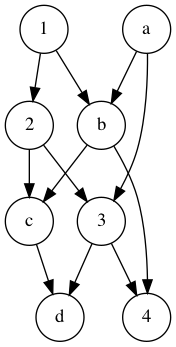

In [56]:
# Grafo de cada path, superpuesto
G=nx.DiGraph()
for (r, P) in paths_from_trace(T5):
    # Grafo simple
    for u, v in zip( P[:-1], P[1:] ):
        G.add_edge(u, v)
graph(G)

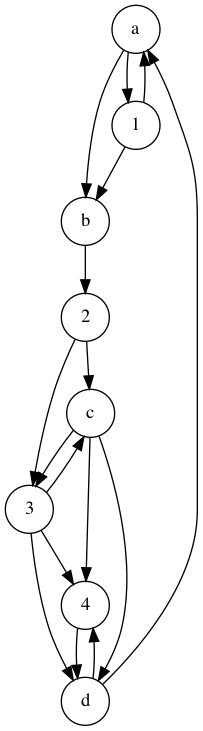

In [21]:

# Grafo simple de la traza
for u, v in zip( T[:-1], T[1:] ):
    G.add_edge(u, v)
graph(G)

Pero... los cliques deben ser disjuntos, o si no el path NO SERIA invariante. Modifiquemos entonces el algo. Ademas creo que el path debe ser maximo, si no faltaria un par. O sea, cualquier subconjunto no disjunto de cliques, esta mezclado